### Your name:

<pre>Ashish Gupta</pre>

### Collaborators:

<pre>Formed a study group with Isaac Aktam and Konrad Korzeniewski</pre>


In [122]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Classification - Based on Week 3

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In week 3, you:
- Explored the dataset
- Built a full data pipeline
- Pre-processed data, explored features

Building on your work of week 3:
- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing
  

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    
  - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.
  

For this assignment, we choose the ROC-AUC as a score measure because:

 - AUC applies to binary classifiers
 - We want to choose hyperparameters with the highest AUC score so that we have a greater True Positives and a lower number of False Positives. Note: higher AUC score does not necessary lead to a higher accuracy score as can be seen in a case of a such hyperparameter as min_samples_split; therefore, we would need to sacrifice some AUC score for the accuracy score.
 

In [123]:
"""
Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of 
probability of default among six data mining methods. From the perspective of risk management, the result of 
predictive accuracy of the estimated probability of default will be more valuable than the binary result of 
classification - credible or not credible clients. Because the real probability of default is unknown, this study 
presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real 
probability of default as the response variable (Y), and the predictive probability of default as the independent 
variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by 
artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to 
zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural 
network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 
"""

import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/"
CREDIT_PATH = os.path.join("datasets", "credit-default")
CREDIT_URL = DOWNLOAD_ROOT + "default%20of%20credit%20card%20clients.xls"

In [124]:
def fetch_creditdefault_data(credit_url=CREDIT_URL, credit_path=CREDIT_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    file_path = os.path.join(credit_path, "default of credit card clients.xls")
    
    urllib.request.urlretrieve(credit_url, file_path) 
    # The commented code above wont execute in proxy settings. Please download the files from Github
    # https://github.com github.com/RoyMachineLearning/3253-Machine-Learning
    
fetch_creditdefault_data()

In [125]:
import pandas as pd

def load_CRDEFAULT_data(credit_path=CREDIT_PATH):
    file_path = os.path.join(credit_path, "default of credit card clients.xls")
    return pd.read_excel(file_path, sheet = 0, skiprows= 1, header = 0)

df = load_CRDEFAULT_data()
df = df.drop('ID',axis=1)

In [126]:
#split the data into Training, Model Stacking and test

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 123)
for train_index, Not_Train_index in split.split(df, df["default payment next month"]):
    strat_train_set = df.loc[train_index]
    Not_Train_set = df.loc[Not_Train_index]
    
# Second split
new_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.5, random_state = 123)
for stack_index, test_index in new_split.split(Not_Train_set, Not_Train_set["default payment next month"]):
    strat_stack_set = df.loc[stack_index]
    strat_test_set = df.loc[test_index]

In [281]:
# The x variable for training set
training_df_X = strat_train_set.drop("default payment next month", axis=1)

#the Y Variable
training_df_Y = strat_train_set["default payment next month"].copy()

# The x variable for Model Stacking set
ModelStacking_df_X = strat_stack_set.drop("default payment next month", axis=1)

#the Y Variable
ModelStacking_df_Y = strat_stack_set["default payment next month"].copy()

# The x variable for test set
test_df_X = strat_test_set.drop("default payment next month", axis=1)

#the Y Variable
test_df_Y = strat_test_set["default payment next month"].copy()

In [282]:
#define the Plots for Checking the roc_auc values vs Parameter

def plot_Parameters_Vs_Scores(criterion_estimators,roc_auc_values,plotType):
    if plotType == "Scatter":
        plt.scatter(criterion_estimators, roc_auc_values)
    if plotType == "Line":
        plt.plot(criterion_estimators, roc_auc_values) 
    plt.xlabel("Parameters Vs AUC Scores")
    plt.legend(loc="best")
    plt.grid(True)

In [283]:
#Evaluate the Decision tree model on the training set
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

criterion_estimators_1 = ['gini', 'entropy']

#Establish the first Parameter.
roc_auc_values = []

for item in criterion_estimators_1:
    Dtree_clf = DecisionTreeClassifier(criterion=item, random_state=42)
    Dtree_clf.fit(training_df_X, training_df_Y)

    y_probas_trees = cross_val_predict(Dtree_clf,training_df_X,training_df_Y, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(training_df_Y,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

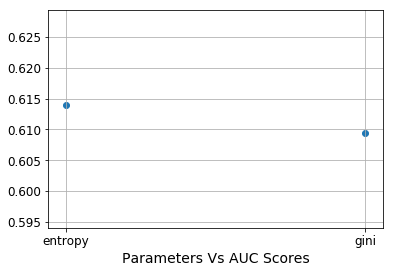

In [284]:
plot_Parameters_Vs_Scores(criterion_estimators_1, roc_auc_values,"Scatter")
plt.show()

In [285]:
param_grid_forest_1 = {'criterion' : criterion_estimators_1}
grid_search_1 = GridSearchCV(Dtree_clf, param_grid_forest_1, cv = 4, scoring='roc_auc', refit = True)
grid_search_1.fit(training_df_X, training_df_Y)

best_params_1 = grid_search_1.best_params_
best_estimators_1 = grid_search_1.best_estimator_

print(best_params_1)
print(best_estimators_1)

{'criterion': 'entropy'}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [286]:
#Print the accuracy score
print(best_estimators_1.score(training_df_X,training_df_Y))

0.999476190476


In [287]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_1 = best_estimators_1.predict(test_df_X)
print(accuracy_score(test_df_Y, y_test_estimations_1))

0.918888888889


As the accuracy drops on the test set - this criterion parameter may not be sufficient enough be a good model.

In [288]:
# Criterion Parameter - Max Depth

criterion_estimators_2 = [1, 2, 3, 4, 5]

roc_auc_values = []

for item in criterion_estimators_2:
    Dtree_clf = DecisionTreeClassifier(max_depth=item, random_state=42)
    Dtree_clf.fit(training_df_X, training_df_Y)

    y_probas_trees = cross_val_predict(Dtree_clf,training_df_X,training_df_Y, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(training_df_Y,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

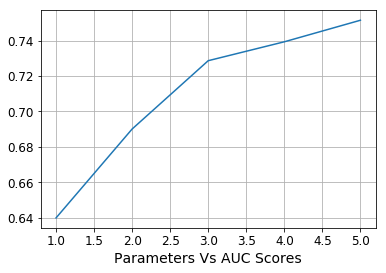

In [289]:
plot_Parameters_Vs_Scores(criterion_estimators_2, roc_auc_values,"Line")
plt.show()

In [290]:
param_grid_forest_2 = {'max_depth' : criterion_estimators_2}
grid_search_2 = GridSearchCV(Dtree_clf, param_grid_forest_2, cv = 4, scoring='roc_auc', refit = True)
grid_search_2.fit(training_df_X, training_df_Y)

best_params_2 = grid_search_2.best_params_
best_estimators_2 = grid_search_2.best_estimator_

print(best_params_2)
print(best_estimators_2)

{'max_depth': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [291]:
#Print the accuracy score
print(best_estimators_2.score(training_df_X,training_df_Y))

0.823285714286


In [292]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_2 = best_estimators_2.predict(test_df_X)
print(accuracy_score(test_df_Y, y_test_estimations_2))

0.807333333333


As the accuracy drops on the test set - this criterion parameter may not be sufficient enough be a good model.

In [293]:
#Criterion = Min Samples Split.
criterion_estimators_3 = list(range(2,10))

roc_auc_values = []

for item in criterion_estimators_3:
    Dtree_clf = DecisionTreeClassifier(min_samples_split=item, random_state=42)
    Dtree_clf.fit(training_df_X, training_df_Y)

    y_probas_trees = cross_val_predict(Dtree_clf,training_df_X,training_df_Y, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(training_df_Y,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

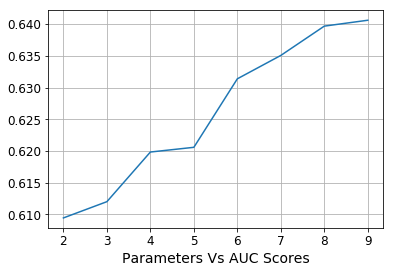

In [294]:
plot_Parameters_Vs_Scores(criterion_estimators_3, roc_auc_values,"Line")
plt.show()

In [295]:
#Set the min_samples_split to None as this parameter keeps increasing at a decreasing rate.But a higher score
# is generated with 20 as min sample split
param_grid_forest_3 = {'min_samples_split' : criterion_estimators_3}
grid_search_3 = GridSearchCV(Dtree_clf, param_grid_forest_3, cv = 4, scoring='roc_auc', refit = True)
grid_search_3.fit(training_df_X, training_df_Y)

best_params_3 = grid_search_3.best_params_
best_estimators_3 = grid_search_3.best_estimator_

print(best_params_3)
print(best_estimators_3)

{'min_samples_split': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [296]:
#Print the accuracy score
print(best_estimators_3.score(training_df_X,training_df_Y))

0.941095238095


In [297]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_3 = best_estimators_3.predict(test_df_X)
print(accuracy_score(test_df_Y, y_test_estimations_3))

0.879111111111


As the accuracy drops on the test set - this criterion parameter may not be sufficient enough be a good model.

In [298]:
#Criteria : min_samples_leaf
criterion_estimators_4 = [(i + 1) / 10 for i in range(5)]

roc_auc_values = []

for item in criterion_estimators_4:
    Dtree_clf = DecisionTreeClassifier(min_samples_leaf=item, random_state=42)
    Dtree_clf.fit(training_df_X, training_df_Y)

    y_probas_trees = cross_val_predict(Dtree_clf,training_df_X,training_df_Y, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(training_df_Y,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

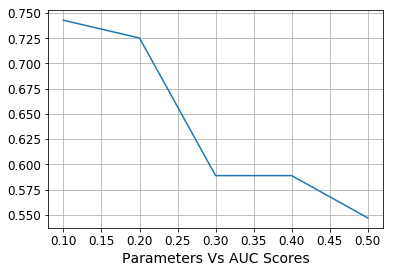

In [299]:
plot_Parameters_Vs_Scores(criterion_estimators_4, roc_auc_values,"Line")
plt.show()

In [300]:
param_grid_forest_4 = {'min_samples_leaf' : criterion_estimators_4}
grid_search_4 = GridSearchCV(Dtree_clf, param_grid_forest_4, cv = 4, scoring='roc_auc', refit = True)
grid_search_4.fit(training_df_X, training_df_Y)

best_params_4 = grid_search_4.best_params_
best_estimators_4 = grid_search_4.best_estimator_

print(best_params_4)
print(best_estimators_4)

{'min_samples_leaf': 0.1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [301]:
#Print the accuracy score
print(best_estimators_4.score(training_df_X,training_df_Y))

0.818


In [302]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_4 = best_estimators_4.predict(test_df_X)
print(accuracy_score(test_df_Y, y_test_estimations_4))

0.804444444444


Compared to the models we have build so far, The Hyper parameter "min_samples_leaf" generates a good accuracy over the test set
when compared to the training set.

In [303]:
#Criterion = max_leaf_nodes
criterion_estimators_5 = list(range(2, 35))

roc_auc_values = []

for item in criterion_estimators_5:
    Dtree_clf = DecisionTreeClassifier(max_leaf_nodes=item, random_state=42)
    Dtree_clf.fit(training_df_X, training_df_Y)

    y_probas_trees = cross_val_predict(Dtree_clf,training_df_X,training_df_Y, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(training_df_Y,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

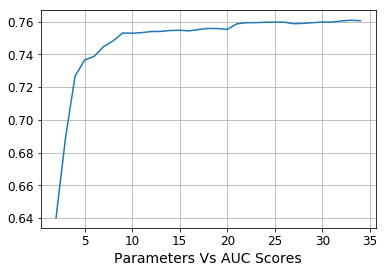

In [304]:
plot_Parameters_Vs_Scores(criterion_estimators_5, roc_auc_values,"Line")
plt.show()

In [305]:
param_grid_forest_5 = {'max_leaf_nodes' : criterion_estimators_5}
grid_search_5 = GridSearchCV(Dtree_clf, param_grid_forest_5, cv = 4, scoring='roc_auc', refit = True)
grid_search_5.fit(training_df_X, training_df_Y)

best_params_5 = grid_search_5.best_params_
best_estimators_5 = grid_search_5.best_estimator_

print(best_params_5)
print(best_estimators_5)

{'max_leaf_nodes': 33}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=33,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [306]:
#Print the accuracy score
print(best_estimators_5.score(training_df_X,training_df_Y))

0.822857142857


In [307]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score
y_test_estimations_5 = best_estimators_5.predict(test_df_X)
print(accuracy_score(test_df_Y, y_test_estimations_5))

0.805555555556


As the accuracy drops on the test set - this criterion parameter may not be sufficient enough be a good model.

tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.

In [308]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [29]:
#tuning all the parameters together 
parameter_distribution = {'criterion' : criterion_estimators_1, 'max_depth' : criterion_estimators_2,
                          'min_samples_split' : criterion_estimators_3, 'min_samples_leaf' : criterion_estimators_4,
                          'max_leaf_nodes' : criterion_estimators_5}

rnd_search_cv = RandomizedSearchCV(Dtree_clf, parameter_distribution, n_iter=10, verbose=2)
rnd_search_cv.fit(training_df_X, training_df_Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=8, min_samples_leaf=0.3, max_leaf_nodes=25, max_depth=3, criterion=gini 
[CV]  min_samples_split=8, min_samples_leaf=0.3, max_leaf_nodes=25, max_depth=3, criterion=gini, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=0.3, max_leaf_nodes=25, max_depth=3, criterion=gini 
[CV]  min_samples_split=8, min_samples_leaf=0.3, max_leaf_nodes=25, max_depth=3, criterion=gini, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=0.3, max_leaf_nodes=25, max_depth=3, criterion=gini 
[CV]  min_samples_split=8, min_samples_leaf=0.3, max_leaf_nodes=25, max_depth=3, criterion=gini, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=0.1, max_leaf_nodes=29, max_depth=4, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=8, min_samples_leaf=0.1, max_leaf_nodes=29, max_depth=4, criterion=entropy, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=0.1, max_leaf_nodes=29, max_depth=4, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=0.1, max_leaf_nodes=29, max_depth=4, criterion=entropy, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=0.1, max_leaf_nodes=29, max_depth=4, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=0.1, max_leaf_nodes=29, max_depth=4, criterion=entropy, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=0.4, max_leaf_nodes=2, max_depth=2, criterion=gini 
[CV]  min_samples_split=4, min_samples_leaf=0.4, max_leaf_nodes=2, max_depth=2, criterion=gini, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=0.4, max_leaf_nodes=2, max_depth=2, criterion=gini 
[CV]  min_samples_split=4, min_samples_leaf=0.4, max_leaf_nodes=2, max_depth=2, criterion=gini, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=0.4, ma

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.5s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=34,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [30]:
#Get the best estimator on Randomized SearchCV
rnd_search_cv.best_estimator_
rnd_search_cv.score(training_df_X,training_df_Y)

0.81799999999999995

In [180]:
# Based on the accuracy scores, we select the best estimator and work with the test set
from sklearn.metrics import accuracy_score

final_model = rnd_search_cv.best_estimator_ #best estimator with accuracy over 99%

y_test_estimations = final_model.predict(test_df_X)

print(accuracy_score(test_df_Y, y_test_estimations))

0.804444444444


#### Conclusions?

For Q1. Decision Tree performs the best under the hyperparameter , {'criterion': 'entropy'} on the training set. But when we compare the model accuracy on the test set. The Accuracy drops considerably - indicating an instance of clear overfitting on the
training set. Thus a higher accuracy is not the only measure. 

Whereas The Hyper parameter "min_samples_leaf" generates a good accuracy over the test set when compared to the training set.
Although the accuracy number is low, but this is a more useful model when compared to other models. 

When we run all the Hyper parameters using randomized search, The model is slightly overfitted. But it is a recommended approach to use with the right number of parameters.

### Ensemble Learning

Make sure to read and understand the documentation for each classifier.

Remember to make your code modular; it will save you rewriting the same things multiple times and will help avoid copy paste errors.


  
- Tune the following classifiers:
  - Random forest classfier
  - Adaboost Tree classifier
  - Extra trees classifier
  - Gradient Boosted Tree classifier
  - Logistic Regression
  
- Analyze, compare, and interpret your results
- What ensemble yields the best result? Can you identify certain types of events that are classified better/worse from the type of algorithm?
- Is the feature importance consistent for all classifiers?

In [309]:
#Preprocessing the data and create pipeline

#create the list to be transformed - Credit DF
training_df_NonTransform = training_df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
training_df_Transform = training_df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]]

#retrieve the column names dropped
#training_df_columns_labels =  training_df_Transform.columns.values.tolist()

#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Convert the non transformed Dataframe into list.
training_df_NonTransform_list = list(training_df_NonTransform)
training_df_Transform_list = list(training_df_Transform)

from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(training_df_Transform_list)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(training_df_NonTransform_list))
    ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("cat_pipeline", cat_pipeline),    
    ("num_pipeline", num_pipeline),
    ])

Final_training_X = full_pipeline.fit_transform(training_df_X)
Final_stack_X = full_pipeline.fit_transform(ModelStacking_df_X)
Final_test_X = full_pipeline.transform(test_df_X)

C:\Users\Owner\Anaconda3.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [310]:
#import the libraries for all the classifiers.

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [311]:
#Design the random forest classifier

# Random Forest Classifier

n_estimators = [10, 200]
max_features = [0.1, 0.5]
max_depth = [2, 10, 20] 
oob_score = [True, False]
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5]
max_leaf_nodes = [2, 10, 100]

parameter_random_forest = {'n_estimators' : n_estimators, 'max_features' : max_features,
                     'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                    'oob_score' : oob_score, 'min_samples_leaf': min_samples_leaf, 
                     'max_leaf_nodes' : max_leaf_nodes}
             
Random_Forest_Classifier = RandomForestClassifier(random_state = 42)

#use grid search to tune the model

grid_search_RndmForest = GridSearchCV(Random_Forest_Classifier,parameter_random_forest, cv = 4, scoring='roc_auc', refit = True,
                                     n_jobs = -1, verbose=2)

grid_search_RndmForest.fit(Final_training_X,training_df_Y)
             
forest_best_params_ = grid_search_RndmForest.best_params_
forest_best_estimators_ = grid_search_RndmForest.best_estimator_

print(forest_best_params_)
print(forest_best_estimators_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  8.6min finished


{'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 10, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 200, 'oob_score': True}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.5, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)


In [312]:
#Now Predict on the Stack Dataset
Random_Forest_estimators = forest_best_estimators_
y_estimator_forest = Random_Forest_estimators.predict(Final_stack_X)
print(accuracy_score(ModelStacking_df_Y, y_estimator_forest))

0.774888888889


In [313]:
# Test on the Test Data
y_final_estimator_forest = Random_Forest_estimators.predict(Final_test_X)
print(accuracy_score(test_df_Y, y_final_estimator_forest))

0.776222222222


With a better accuracy on the test set when compared with the training set, Random Forest proves out to be a good classifier.

To identify certain types of events that are classified better/worse from this classifier - we use the confusion matrix

In [314]:
#Create the confusion Matrix on the stack set for Random Forest Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(ModelStacking_df_Y, y_estimator_forest)

array([[3487,    0],
       [1013,    0]], dtype=int64)

In [315]:
#Create the confusion Matrix on the test set for Random Forest Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(test_df_Y, y_final_estimator_forest)

array([[3493,    0],
       [1007,    0]], dtype=int64)

From the results above, we can see that We have got increased True Positives (more customer's defaulting) and reduced false positives - from stacked / validation set to test set. This also indicates a better accuracy achieved on test set.

Now we capture the feature importance for the random forest classifer - sorted in ascending order

In [227]:
for name, score in sorted(zip(ModelStacking_df_X.columns, Random_Forest_estimators.feature_importances_), key=lambda x: x[1]):
    print(name, score)

SEX 0.0
PAY_2 0.0
PAY_4 0.0
LIMIT_BAL 2.81358049379e-05
PAY_6 4.99291287047e-05
EDUCATION 0.000212320694719
BILL_AMT4 0.00091263474512
BILL_AMT5 0.00133570010001
PAY_3 0.00140259664563
AGE 0.00205676800682
PAY_0 0.00220648491687
BILL_AMT3 0.00321045824914
BILL_AMT6 0.00334079951297
BILL_AMT2 0.00489613021661
PAY_AMT5 0.00491729445122
BILL_AMT1 0.00677123075075
PAY_AMT6 0.00693381567949
PAY_AMT4 0.0165562094364
PAY_AMT3 0.0586180946003
PAY_AMT2 0.0867698487916
PAY_5 0.186237237022
PAY_AMT1 0.186515342298
MARRIAGE 0.427028968948


In [154]:
# Now Build the ADA Boost Classifier

n_estimators = [5, 10, 15, 20]
learning_rate = [0.05, 0.01]
algorithm = ['SAMME', 'SAMME.R']

Ada_Classifer = AdaBoostClassifier(random_state = 42)
parameter_Ada_Classifer = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}
grid_search_AdaClassifier = GridSearchCV(Ada_Classifer, parameter_Ada_Classifer, cv = 4, scoring='roc_auc', refit = True, n_jobs = -1, verbose = 2)
grid_search_AdaClassifier.fit(Final_training_X,training_df_Y)

AdaClassifier_best_params_ = grid_search_AdaClassifier.best_params_
AdaClassifier_best_estimators_ = grid_search_AdaClassifier.best_estimator_
print(AdaClassifier_best_params_)
print(AdaClassifier_best_estimators_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   18.1s finished


{'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 20}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=20, random_state=42)


In [155]:
#check accuracy on stack dataset
AdaClassifier_Estimators = AdaClassifier_best_estimators_
y_estimator_ada = AdaClassifier_Estimators.predict(Final_stack_X)
print(accuracy_score(ModelStacking_df_Y, y_estimator_ada))

0.810666666667


In [156]:
# Check the accuracy on the Test Data
y_final_estimator_ada = AdaClassifier_Estimators.predict(Final_test_X)
print(accuracy_score(test_df_Y, y_final_estimator_ada))

0.804444444444


Now we identify certain types of events that are classified better/worse from ADA classifier - we use the confusion matrix

In [216]:
#Create the confusion Matrix on the stack set for ADA Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(ModelStacking_df_Y, y_estimator_ada)

array([[3370,  117],
       [ 771,  242]], dtype=int64)

In [207]:
#Create the confusion Matrix on the test set for ADA Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(test_df_Y, y_final_estimator_ada)

array([[3220,  273],
       [ 921,   86]], dtype=int64)

From the results above, we can see that We have got decreased True Positives and false negatives (less customer's defaulting) - from stacked / validation set to test set. This also indicates a better accuracy achieved on test set. Also the False positives and true negatives have increased, leading to a higher misclassification rate and lower accuracy. 

Note that although the model accuracy for ADA Classifier is lower on the Test Set. The Lower variance could be due to the number of hyper parameters and their values. It is always recommended to check different hyper parameters. The model thus is still performing well and is not a case of overfitting.

Now we capture the feature importance for the Ada Classifer - Sorted in ascending order

In [231]:
for name, score in sorted(zip(ModelStacking_df_X.columns, AdaClassifier_Estimators.feature_importances_), key=lambda x: x[1]):
    print(name, score)

LIMIT_BAL 0.0
SEX 0.0
EDUCATION 0.0
PAY_2 0.0
PAY_3 0.0
PAY_4 0.0
PAY_5 0.0
PAY_6 0.0
BILL_AMT1 0.0
BILL_AMT2 0.0
BILL_AMT3 0.0
BILL_AMT4 0.0
BILL_AMT5 0.0
BILL_AMT6 0.0
PAY_AMT1 0.0
PAY_AMT2 0.0
PAY_AMT3 0.0
PAY_AMT4 0.0
PAY_AMT5 0.0
PAY_AMT6 0.0
PAY_0 0.1
AGE 0.15
MARRIAGE 0.75


In [137]:
# The next we build is an Extra Trees Classifier

Extra_Classifier = ExtraTreesClassifier(random_state = 42)

n_estimators = [3, 70, 100, 200]
max_features = [0.1,0.3,0.5]
max_depth = [2, 50, 70]
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5] # Mhm, this one leads to accuracy of test and train sets being the same.

parameter_Extra_Classifier = {'n_estimators' : n_estimators, 'max_features' : max_features,
                         'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                         'min_samples_leaf' : min_samples_leaf}

grid_search_ExtraClassifier = GridSearchCV(Extra_Classifier, parameter_Extra_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)
grid_search_ExtraClassifier.fit(Final_training_X,training_df_Y)

Extra_Classifier_best_params_ = grid_search_ExtraClassifier.best_params_
Extra_Classifier_best_estimators_ = grid_search_ExtraClassifier.best_estimator_
print(Extra_Classifier_best_params_)
print(Extra_Classifier_best_estimators_)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.7min finished


{'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 200}
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=50, max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.1, min_samples_split=0.1,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [138]:
#check accuracy on stack data
ExtraClassifier_Estimators = Extra_Classifier_best_estimators_
y_estimator_extra = ExtraClassifier_Estimators.predict(Final_stack_X)
print(accuracy_score(ModelStacking_df_Y, y_estimator_extra))

0.774888888889


In [139]:
# check the accuracy on the Test Data
y_final_estimator_extra = ExtraClassifier_Estimators.predict(Final_test_X)
print(accuracy_score(test_df_Y, y_final_estimator_extra))

0.776222222222


Now we identify certain types of events that are classified better/worse from Extra Trees classifier - we use the confusion matrix

In [213]:
#Create the confusion Matrix on the stack set for Extra Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(ModelStacking_df_Y, y_estimator_extra)

array([[3487,    0],
       [1013,    0]], dtype=int64)

In [215]:
#Create the confusion Matrix on the test set for Extra Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(test_df_Y, y_final_estimator_extra)

array([[3493,    0],
       [1007,    0]], dtype=int64)

Similar to Random Forest, Extra Classifier receives increased True Positives (more customer's defaulting) and reduced false positives - from stacked / validation set to test set. This also indicates a better accuracy achieved on test set.

Now we capture the feature importance for the Extra Trees Classifer, sorted in ascending order.

In [238]:
for name, score in sorted(zip(ModelStacking_df_X.columns, ExtraClassifier_Estimators.feature_importances_), key=lambda x: x[1]):
    print(name, score)

BILL_AMT6 0.00108048461406
BILL_AMT5 0.00152516321207
PAY_AMT4 0.00162780441778
BILL_AMT4 0.00265519204382
PAY_AMT3 0.00266480822751
PAY_AMT2 0.00290465577983
BILL_AMT3 0.00346693738116
BILL_AMT2 0.00353706465493
PAY_AMT1 0.00356014528872
BILL_AMT1 0.00422883550691
PAY_AMT6 0.00504973654066
PAY_6 0.00520091925493
PAY_AMT5 0.00684018186448
EDUCATION 0.00766299514003
SEX 0.0128472456469
PAY_4 0.0669824452564
PAY_2 0.0693010642019
LIMIT_BAL 0.0822968707389
PAY_3 0.0892769408027
PAY_5 0.111961144154
PAY_0 0.140367203638
MARRIAGE 0.168657330985
AGE 0.18130483065


With a better accuracy on the test set when compared with the training set, Extra Trees proves out to be a good classifier.

In [140]:
# Gradient Boosting Classifier

GB_Classifier = GradientBoostingClassifier(random_state = 42)

n_estimators = [3, 7]
learning_rate = [0.1, 0.01, .001]
max_depth = [3, 15, 20]
min_samples_split = [0.2, 0.3]
min_samples_leaf = [3, 4]
max_features = [4, 6]
max_leaf_nodes = [2, 3]
                            
parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
                              'max_leaf_nodes' : max_leaf_nodes}

grid_search_GB_Classifier = GridSearchCV(GB_Classifier, parameter_GB_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_GB_Classifier.fit(Final_training_X,training_df_Y)

GB_Classifier_best_params_ = grid_search_GB_Classifier.best_params_

GB_Classifier_best_estimators_ = grid_search_GB_Classifier.best_estimator_

print(GB_Classifier_best_params_)

print(GB_Classifier_best_estimators_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.1min finished


{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 6, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 0.2, 'n_estimators': 7}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=6, max_leaf_nodes=3, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=3,
              min_samples_split=0.2, min_weight_fraction_leaf=0.0,
              n_estimators=7, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)


In [246]:
#Now Predict on the Stack Dataset
GB_estimators = GB_Classifier_best_estimators_
y_estimator_GB = GB_estimators.predict(Final_stack_X)
print(accuracy_score(ModelStacking_df_Y, y_estimator_GB))

0.774888888889


In [237]:
# check the accuracy on the Test Data
y_final_estimator_GB = GB_estimators.predict(Final_test_X)
print(accuracy_score(test_df_Y, y_final_estimator_GB))

0.776222222222


Now we identify certain types of events that are classified better/worse from Gradient Boosting classifier - we use the confusion matrix

In [235]:
#Create the confusion Matrix on the stack set for GB Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(ModelStacking_df_Y, y_estimator_GB)

array([[3487,    0],
       [1013,    0]], dtype=int64)

In [236]:
#Create the confusion Matrix on the test set for GB Classifier
confusion_matrix(test_df_Y, y_final_estimator_GB)

array([[3493,    0],
       [1007,    0]], dtype=int64)

Gradient Boosting model also receives higher True Positives (more customer's defaulting) and lower false positives - from stacked / validation set to test set. This also indicates a better accuracy achieved on test set.

Now we capture the feature importance for the Gradient Boosting Classifer, sorted in ascending order.

In [240]:
for name, score in sorted(zip(ModelStacking_df_X.columns, GB_estimators.feature_importances_), key=lambda x: x[1]):
    print(name, score)

LIMIT_BAL 0.0
SEX 0.0
EDUCATION 0.0
PAY_0 0.0
PAY_4 0.0
PAY_6 0.0
BILL_AMT1 0.0
BILL_AMT2 0.0
BILL_AMT3 0.0
BILL_AMT4 0.0
BILL_AMT5 0.0
BILL_AMT6 0.0
PAY_AMT1 0.0
PAY_AMT5 0.0
PAY_AMT6 0.0
PAY_AMT2 0.0104714350208
PAY_5 0.0124766227619
PAY_AMT3 0.0125123496832
PAY_3 0.016614420628
PAY_AMT4 0.026053977783
PAY_2 0.259660307931
AGE 0.260725313269
MARRIAGE 0.401485572923


Note that although the model accuracy for Gradient Boosting Classifier is lower on the Test Set. The Lower variance could be due to the number of hyper parameters and their values. It is always recommended to check different hyper parameters. The model thus is still performing well and is not a case of overfitting.

In [269]:
# Create the Logistic Regression model

Logistic_Regression = LogisticRegression(random_state = 42)
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
                            
parameter_LogReg = {'C' : C}
grid_search_LogReg = GridSearchCV(Logistic_Regression, parameter_LogReg, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_LogReg.fit(Final_training_X,training_df_Y)
LogReg_best_params_ = grid_search_LogReg.best_params_
LogReg_best_estimators_ = grid_search_LogReg.best_estimator_

print(LogReg_best_params_)
print(LogReg_best_estimators_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.2s finished


{'C': 0.3}
LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [270]:
#Now Predict on the Stack Dataset
LogReg_estimators = LogReg_best_estimators_ 
y_estimator_LogReg = LogReg_estimators.predict(Final_stack_X)
print(accuracy_score(ModelStacking_df_Y, y_estimator_LogReg))

0.801111111111


In [271]:
y_final_estimator_LogReg = LogReg_estimators.predict(Final_stack_X)
print(accuracy_score(test_df_Y, y_final_estimator_LogReg))

0.738888888889


Now we identify certain types of events that are classified better/worse from Logistic Regression - we use the confusion matrix

In [272]:
#Create the confusion Matrix on the stack set for Logistic Regression Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(ModelStacking_df_Y, y_estimator_LogReg)

array([[3378,  109],
       [ 786,  227]], dtype=int64)

In [273]:
#Create the confusion Matrix on the test set for Logistic Regression Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(test_df_Y, y_final_estimator_LogReg)

array([[3241,  252],
       [ 923,   84]], dtype=int64)

In the logistic regression model, we can observe that True Positives and False Negatives have dropped significantly (the defaults on the credit have reduced) from Stack Set to the test set. This is a good indication of overfitting of data on the stack set. This can also be observed based on the variance in the accuracy of Training and Test Set, The Logistic Regression model is an ideal case of overfitting.

##### Please Note: We can't run the feature importance on the Logistic Regression

So the Best Models are Random Forest, Gradient Boosting and Extra Trees Classifier - As they fit the data well.Since these models are heavy on Hyper Parameters, we can say that more Hyper parameters improves the model performance.

##### Conclusion on Feature Importance.

From the classifiers that support Feature importance. We can say that feature importance is not consistent for all the classifiers

PART B of the Second Question
- Stack your models. 
  - Combine the models from the previous section using the stacking approach: 
    - Choose the model use to combine. Examples are:
      - Linear Regression
      - Logistic Regression

In [257]:
# Now build the Stacking model
import numpy as np

Final_Stacking_X = np.vstack((y_estimator_forest, y_estimator_ada, y_estimator_extra, 
                                 y_final_estimator_GB, y_estimator_LogReg))

Final_Stacking_X = Final_Stacking_X.T
Final_Stacking_X.shape # now we get the right number of rows and columns

(4500, 5)

In [274]:
# Additionally we can check the Stack performance on the Logistic Regression model, 

Logistic_Regression = LogisticRegression(random_state = 42)
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
                            
parameter_LogReg = {'C' : C}
grid_search_LogReg = GridSearchCV(Logistic_Regression, parameter_LogReg, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_LogReg.fit(Final_Stacking_X,ModelStacking_df_Y)
LogReg_New_best_params = grid_search_LogReg.best_params_
LogReg_New_best_estimators = grid_search_LogReg.best_estimator_

print(LogReg_New_best_params)
print(LogReg_New_best_estimators)


Fitting 4 folds for each of 6 candidates, totalling 24 fits
{'C': 0.0001}
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.8s finished


In [275]:
# Now check the accuracy of the Stacked Training set with the original Model Stacking Y.
y_estimator_LogReg = LogReg_New_best_estimators.predict(Final_Stacking_X)
print(accuracy_score(ModelStacking_df_Y, y_estimator_LogReg))

0.774888888889


In [276]:
# Now check the accuracy of the Stacked Training set with the original Test Y
y_final_estimator_LogReg = LogReg_New_best_estimators.predict(Final_Stacking_X)
print(accuracy_score(test_df_Y,y_estimator_LogReg))

0.776222222222


#### Conclusions?

##### The Stack approach works well with the logistic regression as the accuracy improves on the test set when compared with the original stack/validation set.

Q. (Optional) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

If a Decision Tree is overfitting the training set, it may be a good idea to decrease max_depth, since it will constrain the model and regularize it.

Q. (Optional) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

In Decision Trees, a small change in the data can lead to completely different boundaries. Scaling here would be a bad idea, instead use hyper-parameters for regularization

Q. (Optional) What is the difference between hard and soft voting classifiers?

A hard voting classifier counts the votes of each classifier in the ensemble and picks the class that gets the most votes. A soft voting classifier computes the average estimated class probability for each class and picks the class with the highest probability. 

Q. (Optional) If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?

If your AdaBoost ensemble underfits the training data,  Relaxing the hyperparameters by adding more estimators or increasing a learning rate may help. Heavy regularized model will lead to underfitting on the training dataset.

Q. (Optional) If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

If you Gradient Boosting ensemble model overfits the training set, you should try decreasing the learning rate. 

Incase of overfitting on the training set, decrease hyperparameters (more regularization)
Or else increase hyperparameters (less regularization) in case of underfitting.